In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest
from ydata_profiling import ProfileReport

In [16]:
file_path = r"S:\Linear Regression Project\Flight Price Prediction\Data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Delhi,Cochin,19:10:00,04:25:00,1995,2.0,In-flight meal not included,8834
1,Jet Airways,2019-03-06,Banglore,New Delhi,08:00:00,07:40:00,1420,1.0,No Info,14815
2,Jet Airways,2019-05-21,Kolkata,Banglore,17:00:00,14:25:00,1285,1.0,No Info,11467
3,Jet Airways,2019-05-21,Kolkata,Banglore,20:00:00,09:20:00,800,1.0,No Info,14781
4,Multiple Carriers,2019-06-27,Delhi,Cochin,09:00:00,21:00:00,720,1.0,No Info,7408
...,...,...,...,...,...,...,...,...,...,...
635,Vistara,2019-03-24,Banglore,New Delhi,07:00:00,09:40:00,160,0.0,No Info,4878
636,Air Asia,2019-06-15,Delhi,Cochin,07:55:00,22:25:00,870,1.0,No Info,6253
637,Air India,2019-06-24,Delhi,Cochin,10:00:00,19:15:00,555,1.0,No Info,9194
638,Jet Airways,2019-06-03,Delhi,Cochin,11:30:00,19:00:00,450,1.0,In-flight meal not included,10262


In [17]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [18]:
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True)
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [19]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [20]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-30 19:10:00,2024-07-30 04:25:00,1995,2.0,In-flight meal not included,8834
1,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-30 08:00:00,2024-07-30 07:40:00,1420,1.0,No Info,14815
2,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-30 17:00:00,2024-07-30 14:25:00,1285,1.0,No Info,11467
3,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-30 20:00:00,2024-07-30 09:20:00,800,1.0,No Info,14781
4,Multiple Carriers,2019-06-27,Delhi,Cochin,2024-07-30 09:00:00,2024-07-30 21:00:00,720,1.0,No Info,7408


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [22]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,652.390625,0.862500,9106.750000
std,502.069103,0.675875,4365.055287
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5292.750000
50%,535.000000,1.000000,8564.000000
75%,932.500000,1.000000,12249.750000
max,2280.000000,3.000000,31945.000000


In [23]:
(
    train.assign(
        total_stops = train["total_stops"].astype(object)
    ).describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,226,267,267,342.0,506


## High Level Analysis of Missing Values

In [24]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## Analysis of Outliers

In [25]:
forest = IsolationForest()

In [26]:
(
    train
    .assign(outlier = forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-30 19:10:00,2024-07-30 04:25:00,1995,2.0,In-flight meal not included,8834,-1
1,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-30 08:00:00,2024-07-30 07:40:00,1420,1.0,No Info,14815,-1
2,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-30 17:00:00,2024-07-30 14:25:00,1285,1.0,No Info,11467,-1
5,Air India,2019-03-21,Delhi,Cochin,2024-07-30 06:05:00,2024-07-30 09:25:00,1640,1.0,No Info,7532,-1
6,Indigo,2019-06-24,Mumbai,Hyderabad,2024-07-30 19:05:00,2024-07-30 20:35:00,90,0.0,No Info,2754,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Air India,2019-05-18,Kolkata,Banglore,2024-07-30 08:20:00,2024-07-30 18:30:00,610,2.0,No Info,10907,-1
630,Indigo,2019-05-09,Mumbai,Hyderabad,2024-07-30 02:35:00,2024-07-30 04:05:00,90,0.0,No Info,2754,-1
632,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-30 16:00:00,2024-07-30 19:45:00,1665,1.0,No Info,17024,-1
633,Air India,2019-06-09,Delhi,Cochin,2024-07-30 09:45:00,2024-07-30 09:25:00,1420,2.0,No Info,11185,-1


## Pair Plots

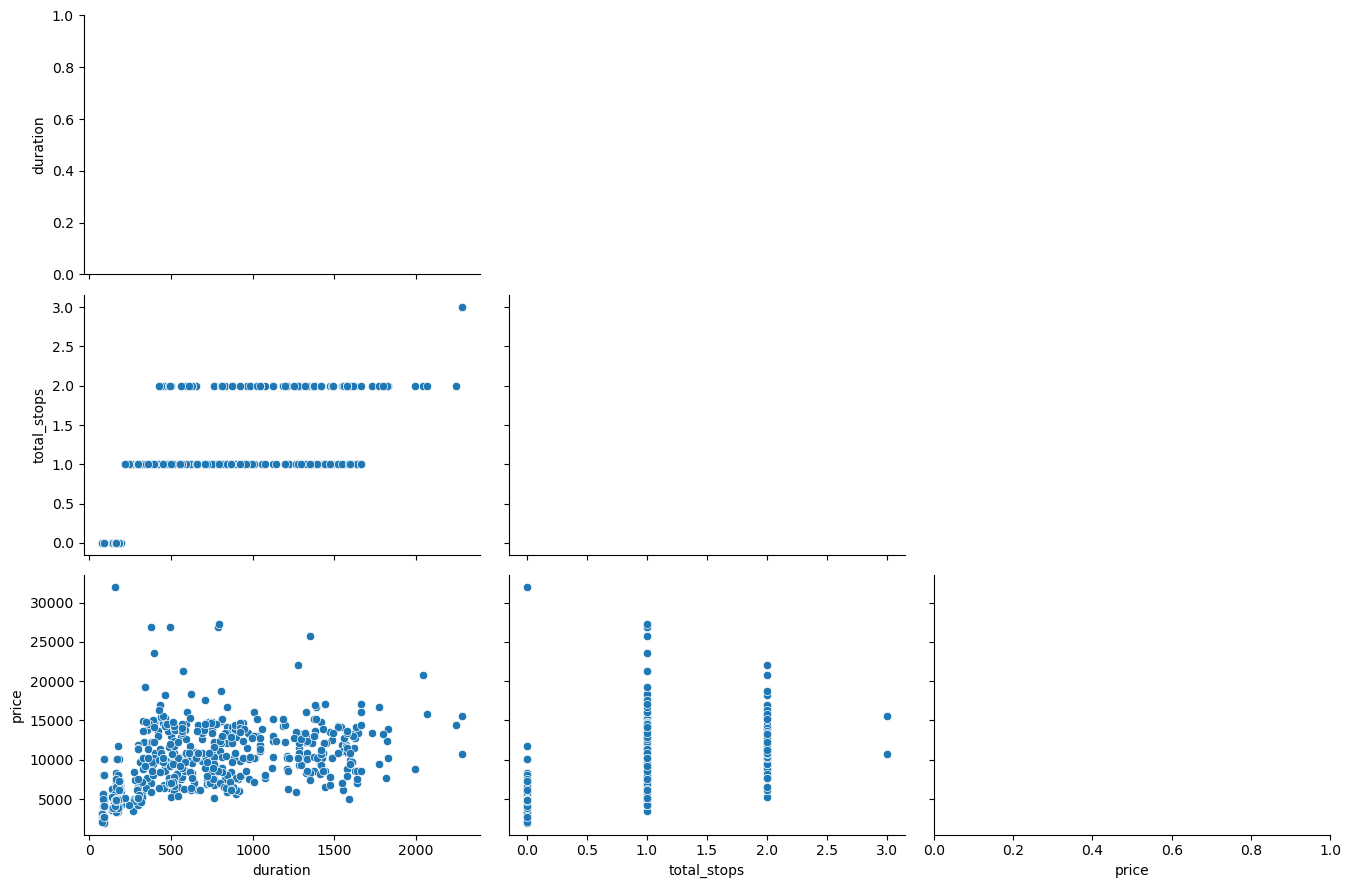

In [27]:
eda_helper_functions.pair_plots(train)

## Correlation Analysis

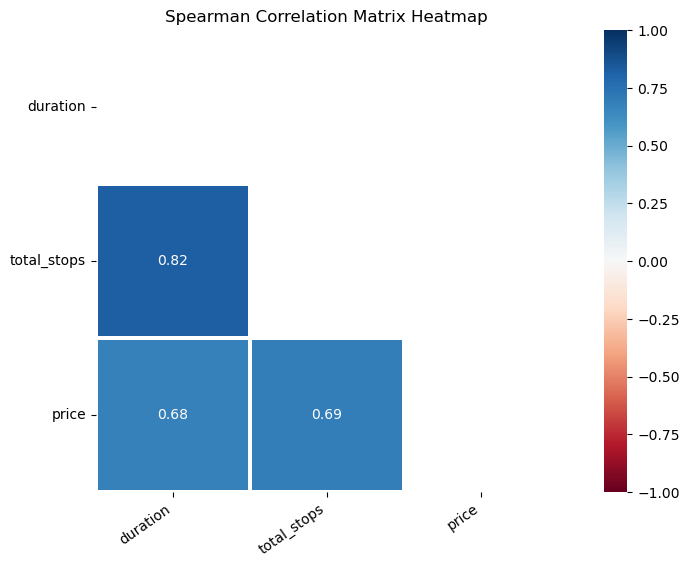

In [28]:
eda_helper_functions.correlation_heatmap(train)

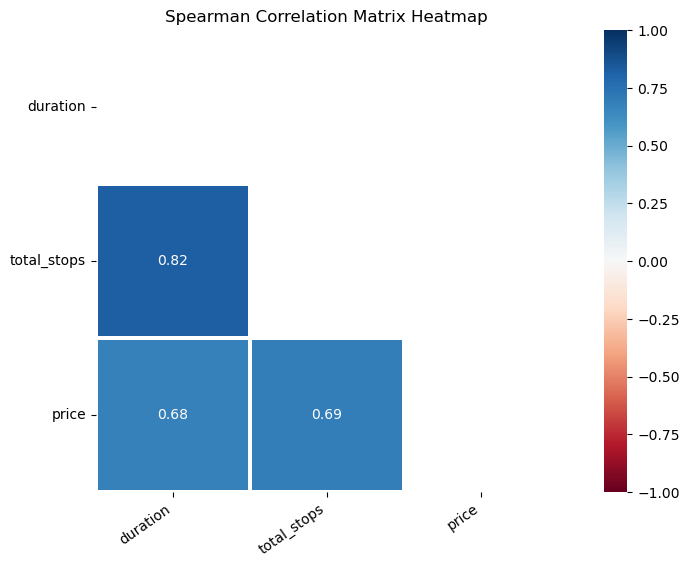

In [29]:
eda_helper_functions.correlation_heatmap(train)

## Detailed Analysis

In [30]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### airline

In [31]:
train.airline

0            Jet Airways
1            Jet Airways
2            Jet Airways
3            Jet Airways
4      Multiple Carriers
             ...        
635              Vistara
636             Air Asia
637            Air India
638          Jet Airways
639             Air Asia
Name: airline, Length: 640, dtype: object

In [32]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1            Jet Airways
2            Jet Airways
3            Jet Airways
4      Multiple Carriers
             ...        
635              Vistara
636             Air Asia
637            Air India
638          Jet Airways
639             Air Asia
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,226


,count,percentage
category,,
Jet Airways,226,0.353125
Indigo,123,0.192188
Air India,116,0.181250
Multiple Carriers,75,0.117188
Spicejet,48,0.075000
Vistara,23,0.035937
Air Asia,21,0.032813
Goair,8,0.012500


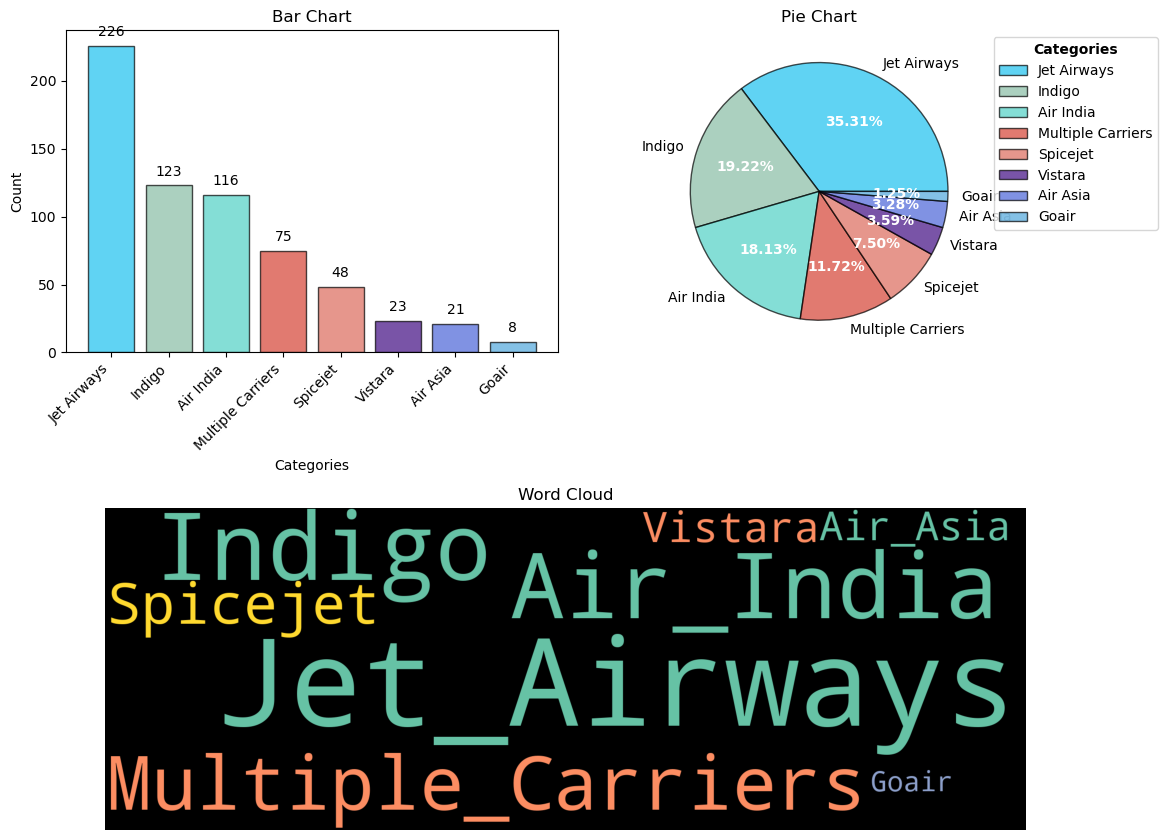

In [33]:
eda_helper_functions.cat_univar_plots(train, "airline")

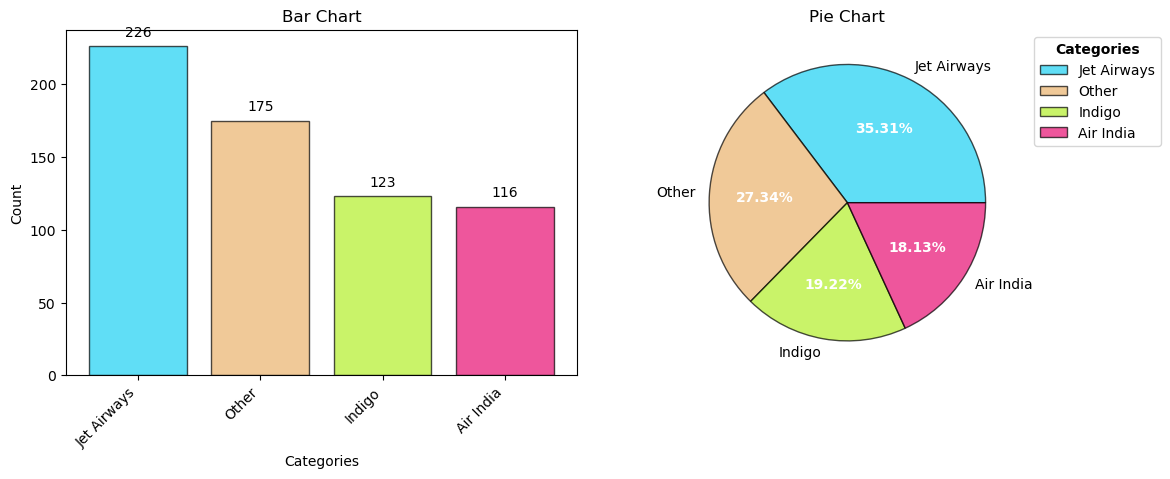

In [34]:
eda_helper_functions.cat_univar_plots(train,"airline", show_wordcloud = False, k=3)

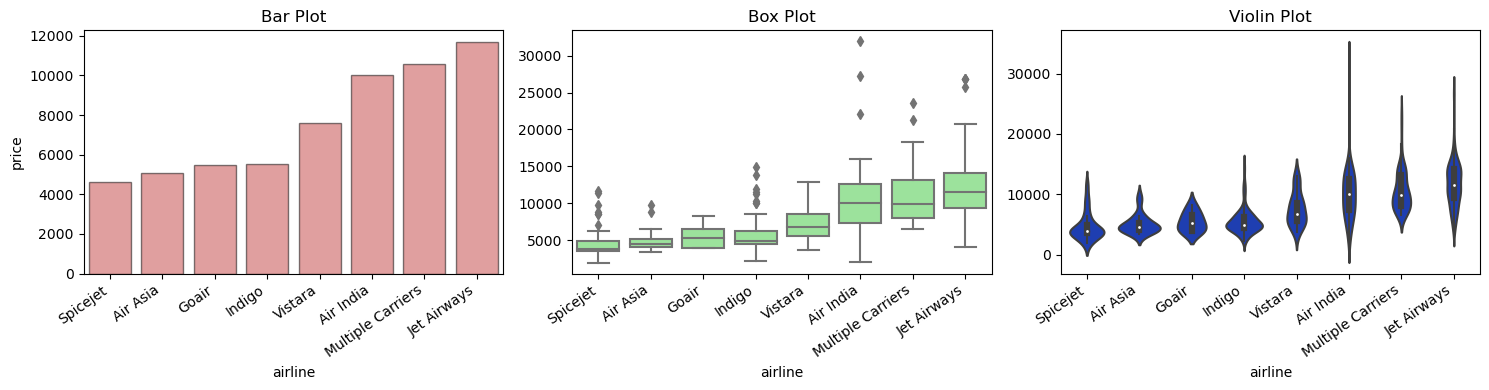

In [35]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='price',
    cat_var='airline'
)

In [36]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 59.01321735962146
- p-value              : 5.067711044416032e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 309.0910990648768
- p-value              : 6.915476790560101e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


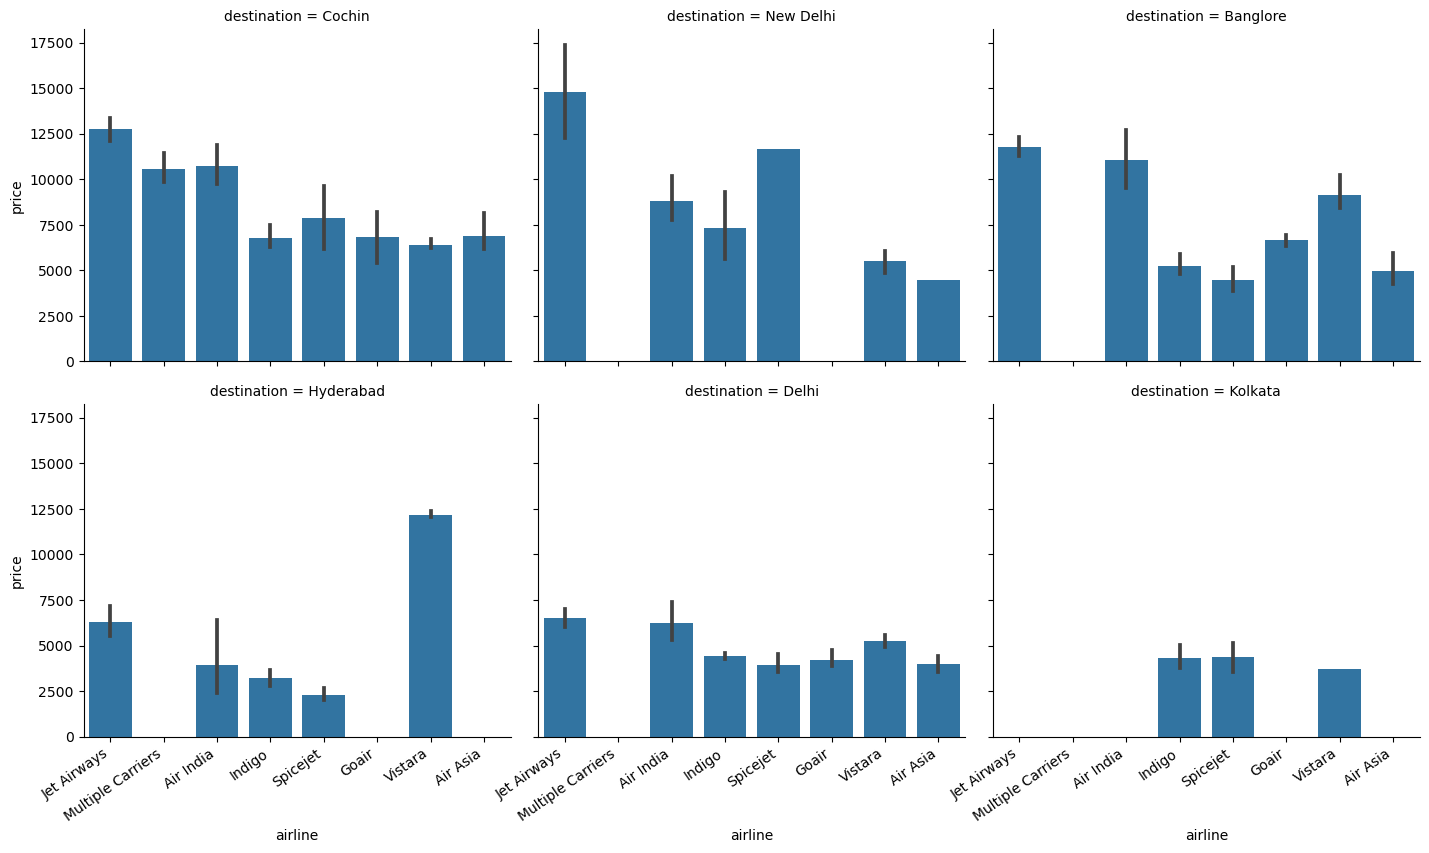

In [40]:
airline_grid = sns.FacetGrid(
    data=train,
    col='destination',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### Date of journey

In [41]:
train.date_of_journey

0     2019-03-21
1     2019-03-06
2     2019-05-21
3     2019-05-21
4     2019-06-27
         ...    
635   2019-03-24
636   2019-06-15
637   2019-06-24
638   2019-06-03
639   2019-03-27
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

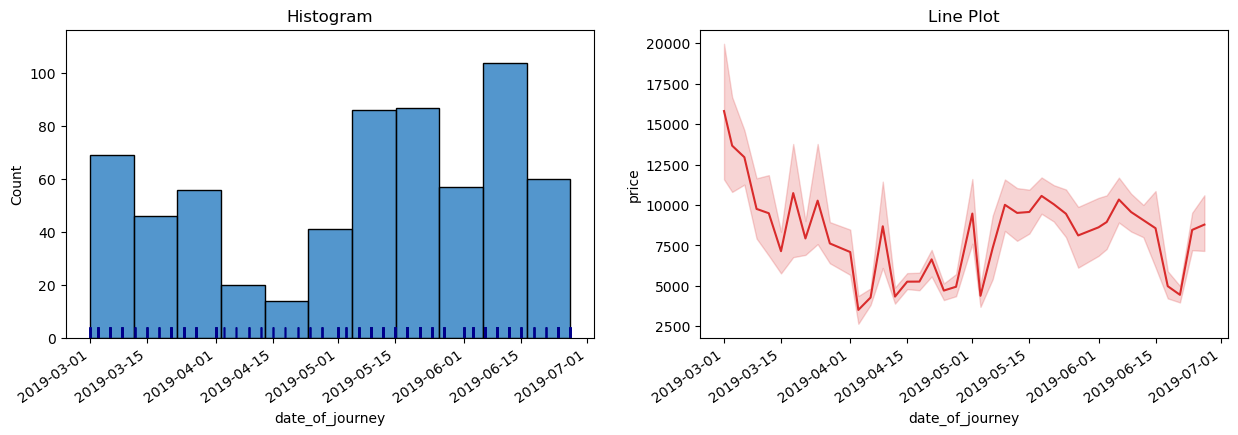

In [43]:
eda_helper_functions.dt_univar_plots(train, "date_of_journey", "price")

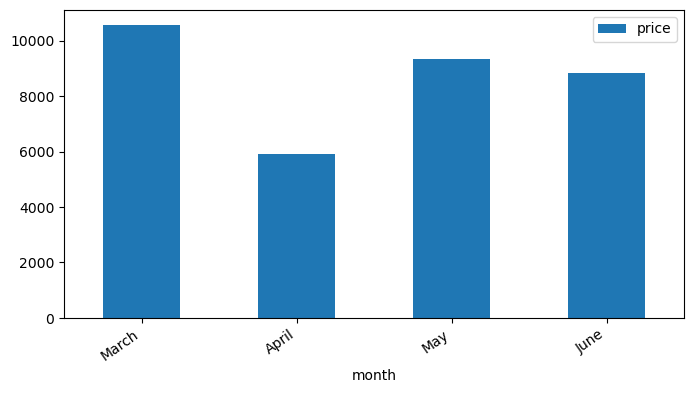

In [54]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis(index='month')
    .plot(
        kind="bar",
        figsize=(8,4),
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

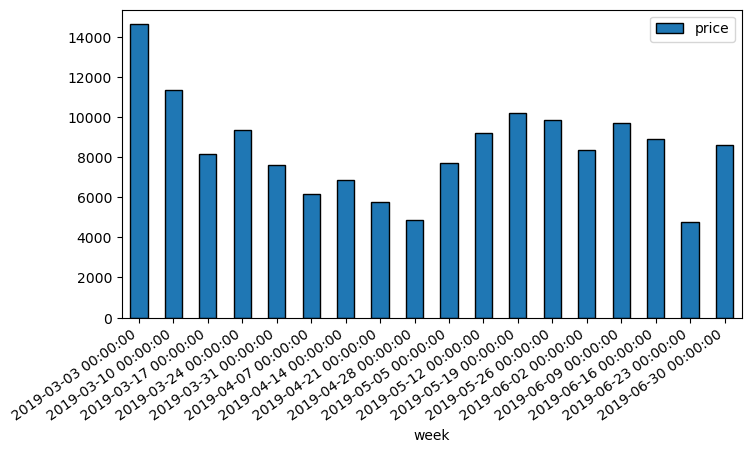

In [55]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

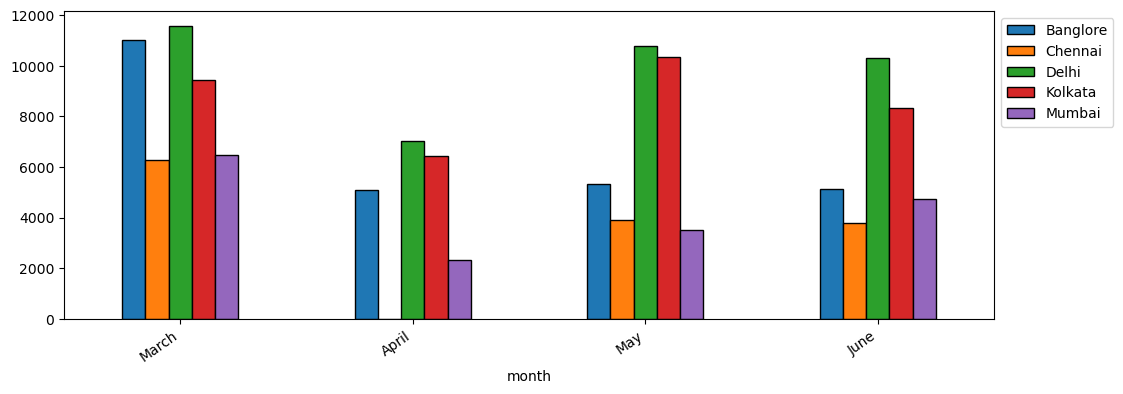

In [56]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### Dep_time

In [57]:
train.dep_time

0     2024-07-30 19:10:00
1     2024-07-30 08:00:00
2     2024-07-30 17:00:00
3     2024-07-30 20:00:00
4     2024-07-30 09:00:00
              ...        
635   2024-07-30 07:00:00
636   2024-07-30 07:55:00
637   2024-07-30 10:00:00
638   2024-07-30 11:30:00
639   2024-07-30 16:45:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

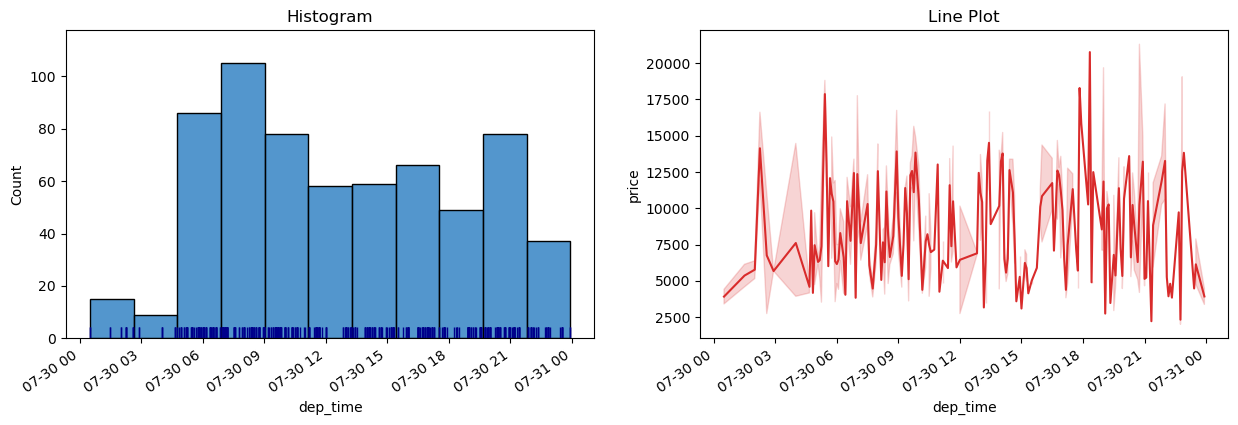

In [58]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")


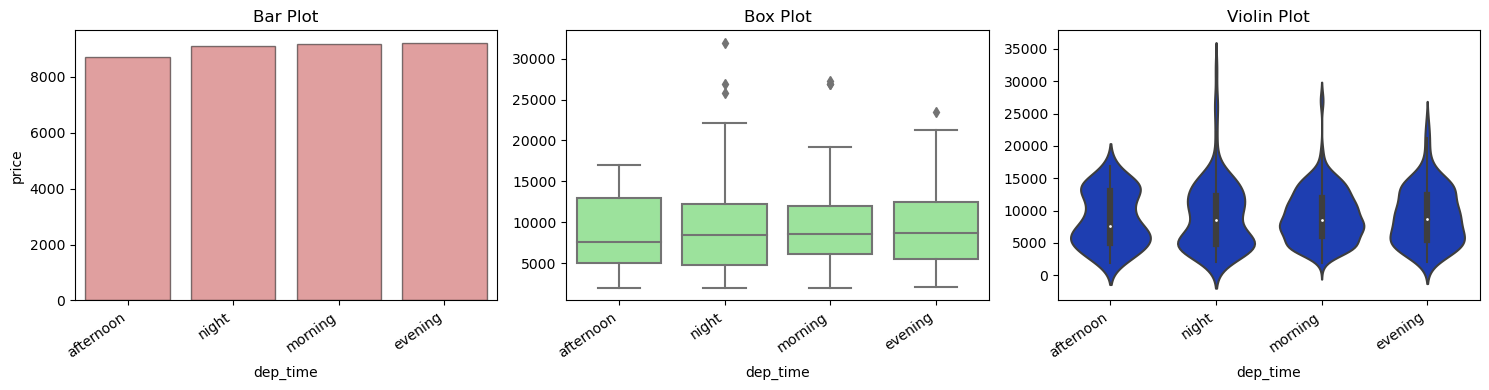

In [59]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)


### duration


In [61]:
train.duration

0      1995
1      1420
2      1285
3       800
4       720
       ... 
635     160
636     870
637     555
638     450
639     865
Name: duration, Length: 640, dtype: int64

In [62]:
eda_helper_functions.num_summary(train, "duration")

0      1995
1      1420
2      1285
3       800
4       720
       ... 
635     160
636     870
637     555
638     450
639     865
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,150.0
25,175.0
50,535.0
75,932.5
90,1430.5
95,1595.0
99,1830.0


,value
mean,652.390625
trimmed mean (5%),621.640625
trimmed mean (10%),594.951172
median,535.000000


,value
var,252073.383950
std,502.069103
IQR,757.500000
mad,365.000000
coef_variance,0.769584


,value
skewness,0.817917
kurtosis,-0.291746


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.5613778847607122e-20
Test Statistic       : 0.894564151763916
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.021509481394787
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [63]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    535.0
0.75    932.5
Name: duration, dtype: float64

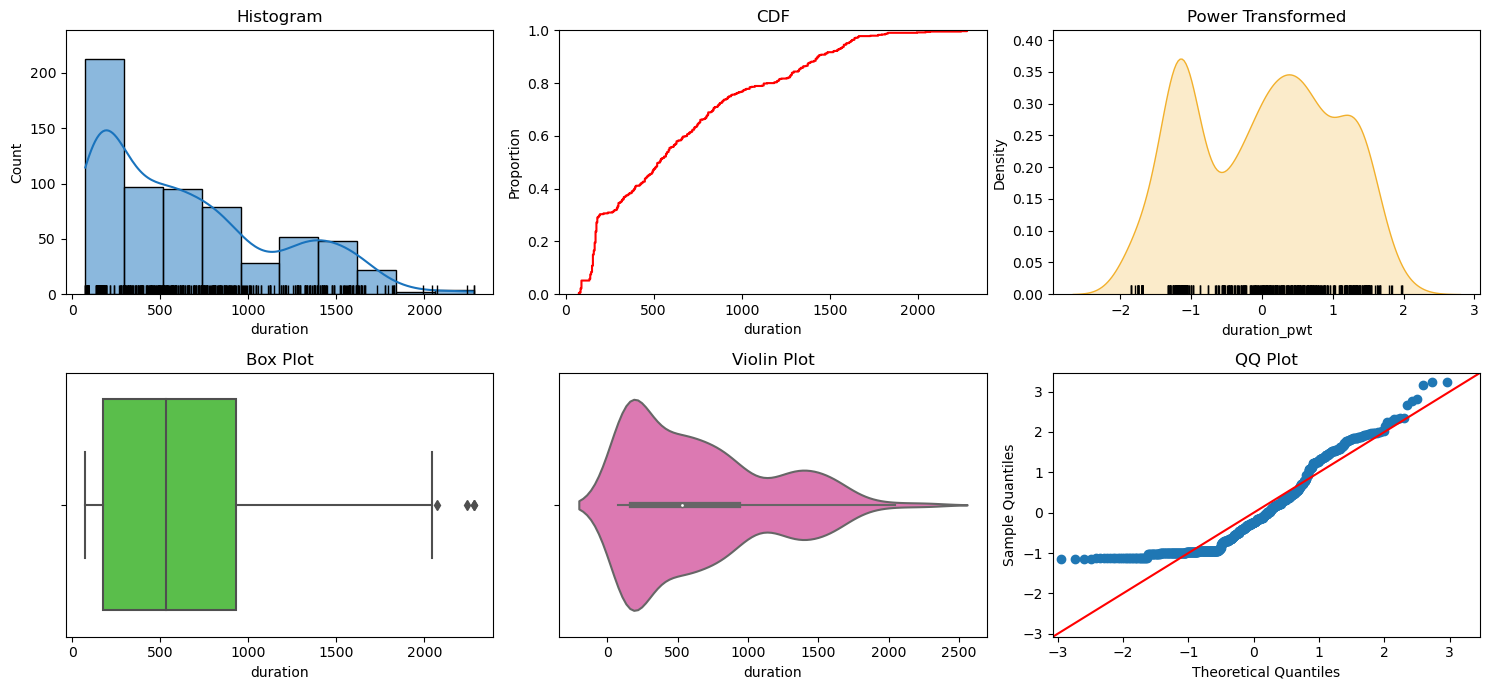

In [64]:
eda_helper_functions.num_univar_plots(train, "duration")


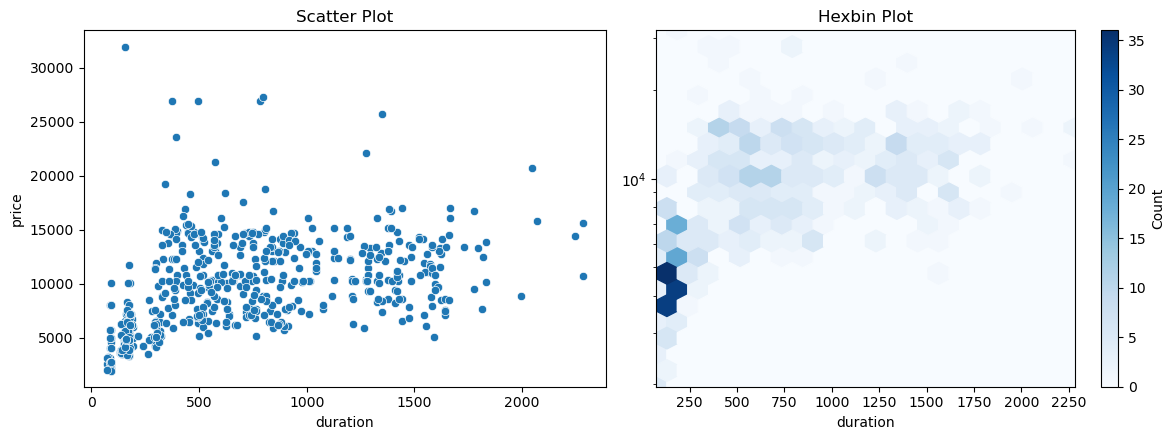

In [65]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [66]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.510569697042252
- p-value              : 8.844812000270208e-44
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6752883410707016
- p-value              : 2.0963346461853556e-86
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


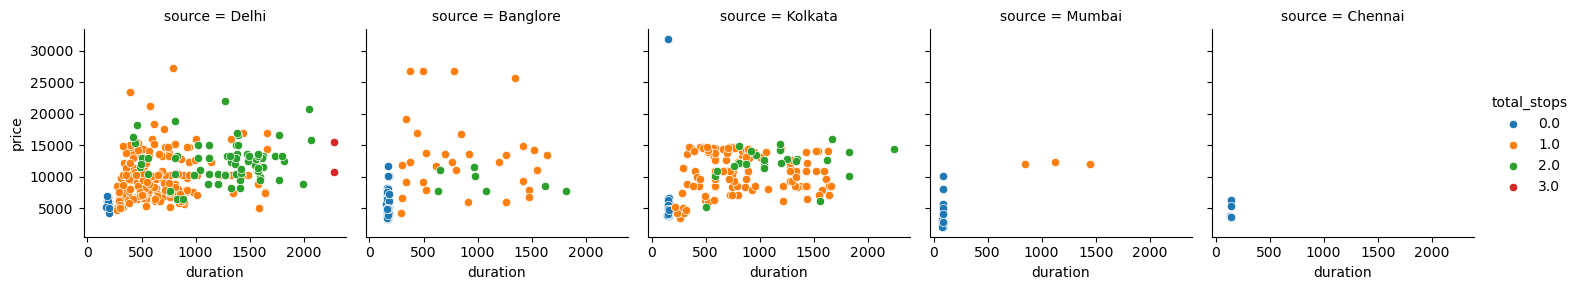

In [67]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

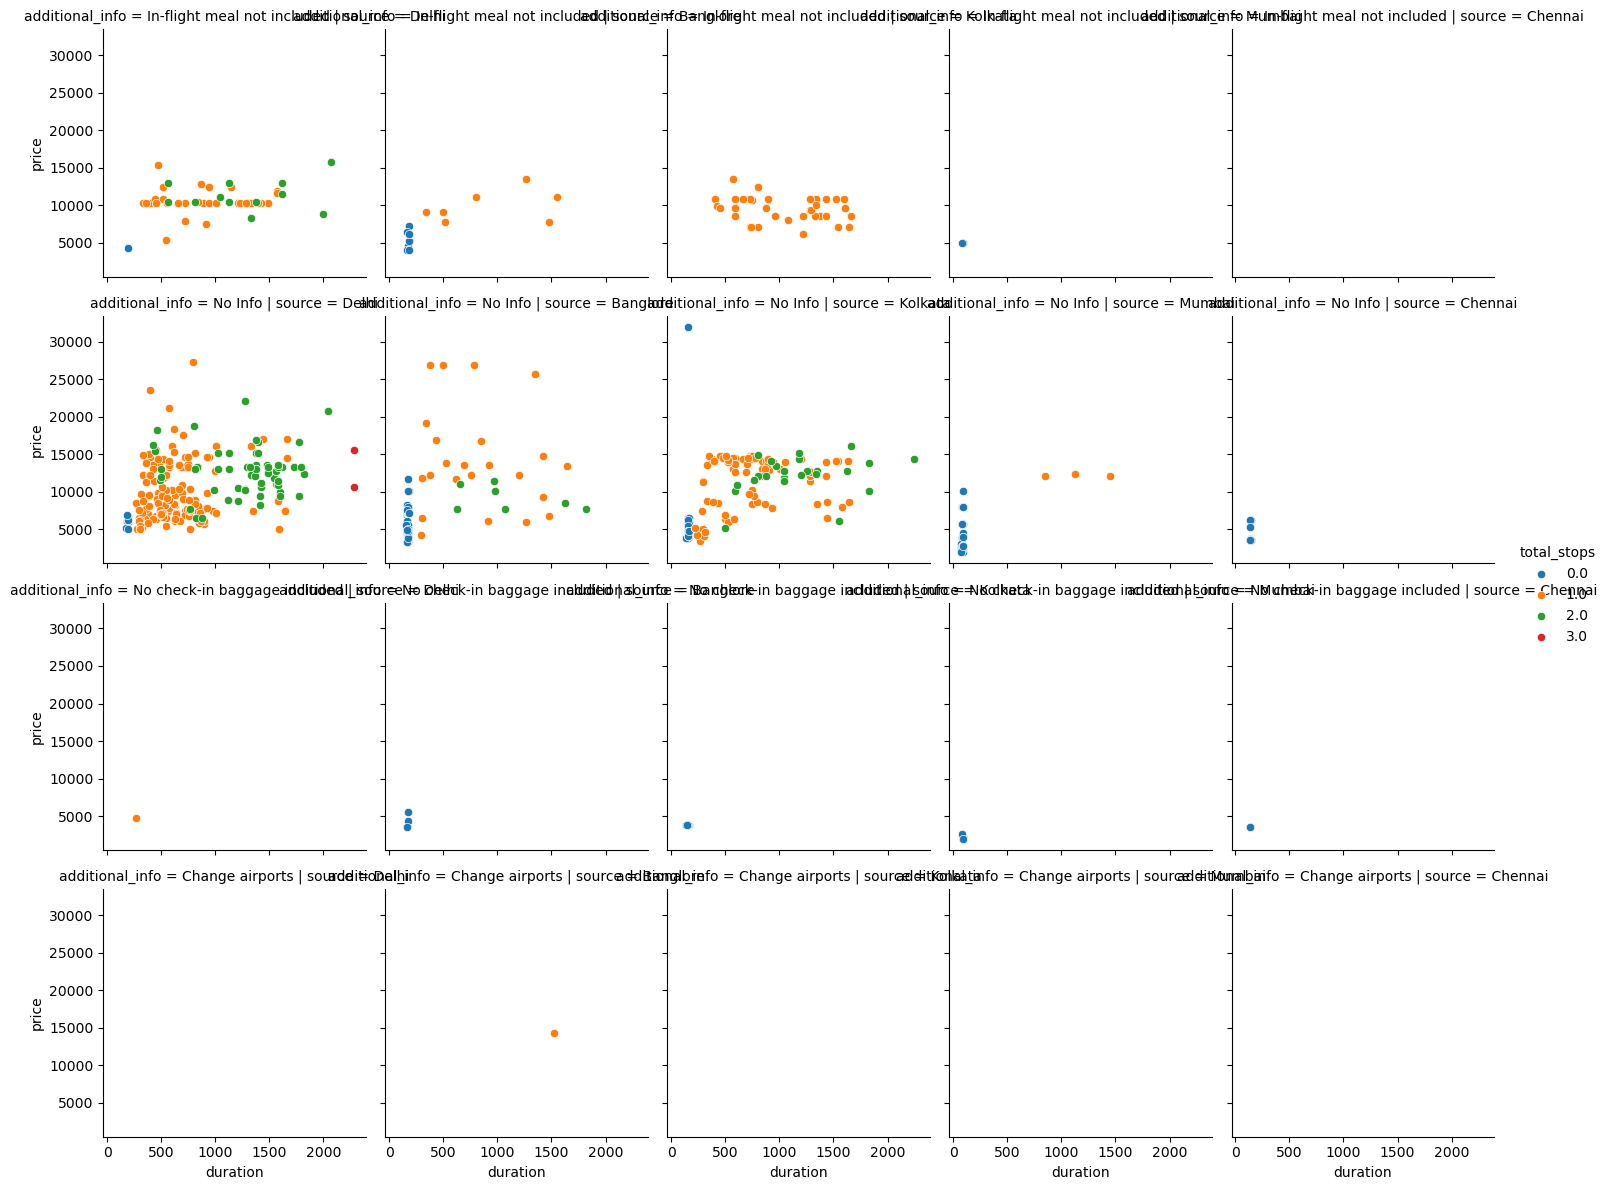

In [68]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [69]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -961.25
Upper Limit : 2068.75


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
563,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-30 17:55:00,2024-07-30 04:25:00,2070,2.0,In-flight meal not included,15812
460,Air India,2019-03-24,Kolkata,Banglore,2024-07-30 09:50:00,2024-07-30 23:15:00,2245,2.0,No Info,14410
122,Air India,2019-05-09,Delhi,Cochin,2024-07-30 05:15:00,2024-07-30 19:15:00,2280,3.0,No Info,10703
390,Air India,2019-03-09,Delhi,Cochin,2024-07-30 05:15:00,2024-07-30 19:15:00,2280,3.0,No Info,15586


### additional info

In [70]:
eda_helper_functions.cat_summary(train, "additional_info")

0      In-flight meal not included
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638    In-flight meal not included
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,506


,count,percentage
category,,
No Info,506,0.790625
In-flight meal not included,109,0.170313
No check-in baggage included,24,0.037500
Change airports,1,0.001563


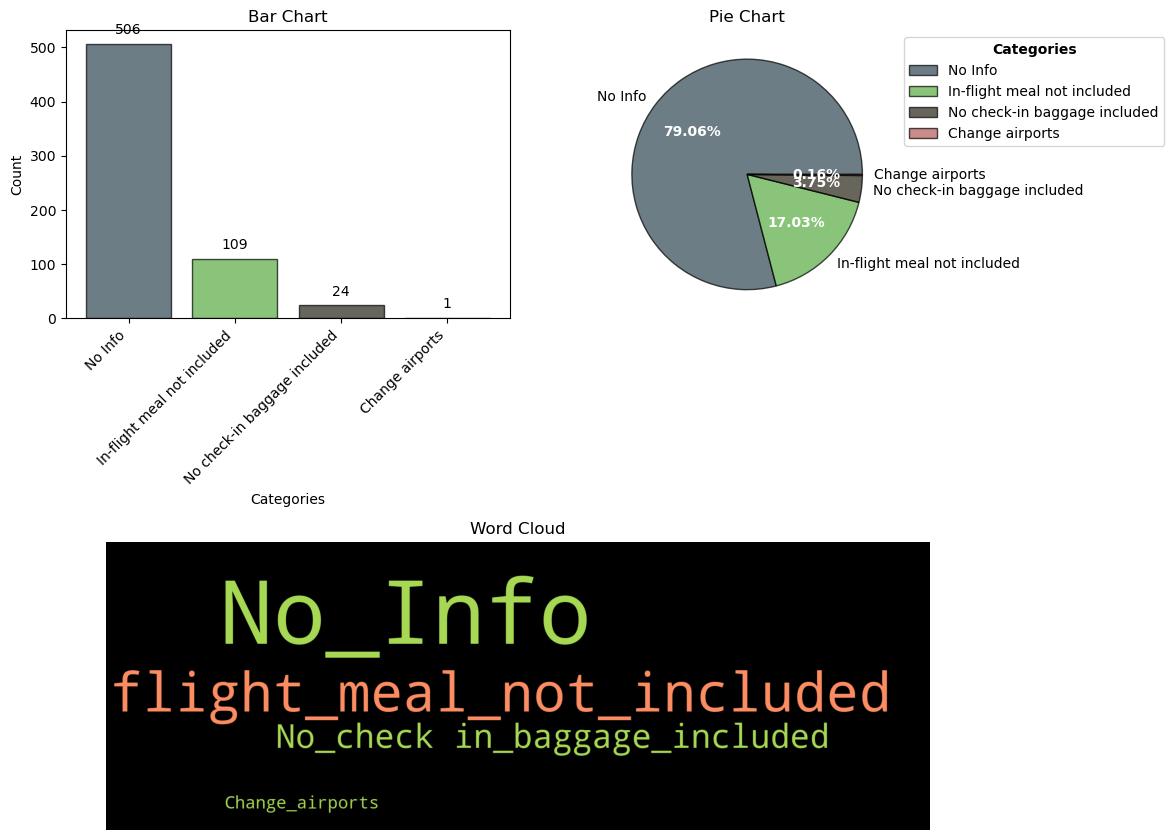

In [71]:
eda_helper_functions.cat_univar_plots(train, "additional_info")


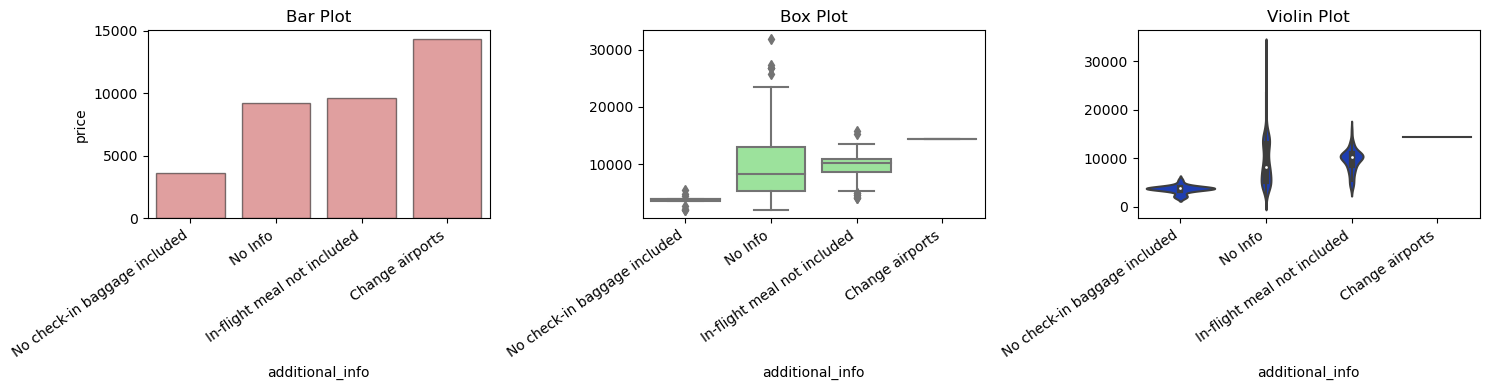

In [72]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

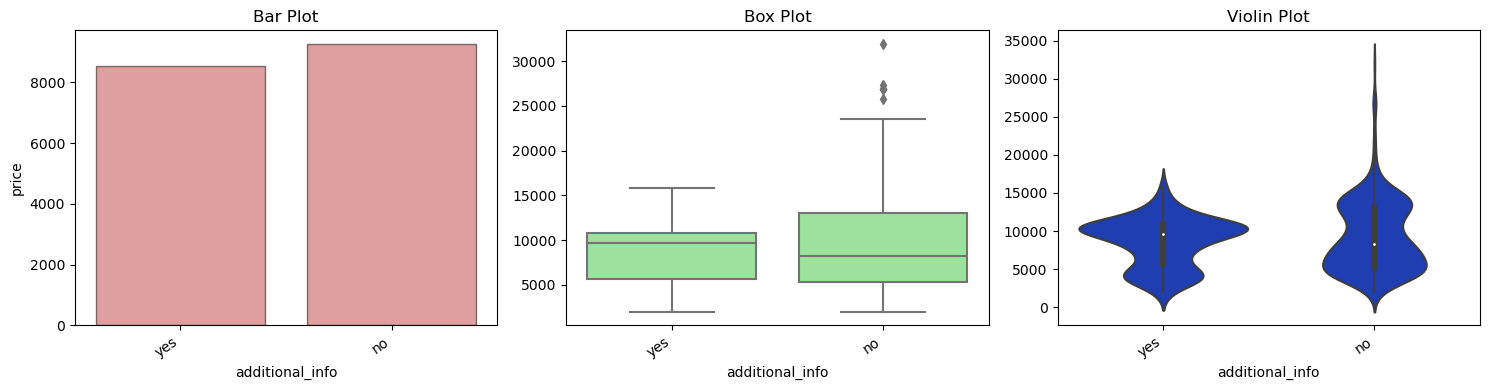

In [73]:

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

In [74]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

# Automated EDA

In [78]:
report = ProfileReport(train)
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]